In [1]:
import numpy as np
import mpmath as mp

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from lib.renormalization.potts_renormalization import *

# Renormalization group flow

In [2]:
q = 6

J = -2
K = 1

dtype = 'npf';
mp.mp.dps = 10;
mp.mp.pretty = False

potts = PottsRenormalizationGroup(J, K, q, dtype)

In [3]:
n = 25
T = potts.transfer_matrix
T = potts.renormalize(T)
print(T, end='\n\n')

[[1.70225068e-17 2.35772264e-56 1.77249437e-23 1.77249437e-23
  2.17127588e-23 6.98161320e-14]
 [2.43819104e-04 3.37704550e-43 2.53880344e-10 2.53880344e-10
  3.10999154e-10 1.00000000e+00]
 [8.68701202e-15 1.20320497e-53 9.04548319e-21 9.04548319e-21
  1.10805652e-20 3.56289227e-11]
 [8.68701202e-15 1.20320497e-53 9.04548319e-21 9.04548319e-21
  1.10805652e-20 3.56289227e-11]
 [2.43819104e-04 3.37704550e-43 2.53880344e-10 2.53880344e-10
  3.10999154e-10 1.00000000e+00]
 [1.70225068e-17 2.35772264e-56 1.77249437e-23 1.77249437e-23
  2.17127588e-23 6.98161320e-14]]



# Phase diagram calculations

In [31]:
%%time

n = 25

dtype = 'mpf';
mp.mp.dps = 25;

num = 503
J_values = np.linspace(start=-2, stop=2, num=num)
K_values = np.linspace(start=-1, stop=2, num=num)

disorder = []
orderA = []
orderB = []
orderC = []
other = []

for i, J in enumerate(J_values):

    for K in K_values:

        print("J = %.3f; K = %.3f" % (J, K), end='')
        print("\t\t\t", end='\r')

        potts = PottsRenormalizationGroup(J, K, 6, dtype)
        T = potts.transfer_matrix
        T, phase = potts.phase(T, n)

        if phase == "D": # All 1
            disorder.append([J, K])

        elif phase == "OA": # Only main diagonal
            orderA.append([J, K])

        elif phase == "OB": # Only anti-diagonal
            orderB.append([J, K])
            
        elif phase == "OC": # Only main diagonal + anti-diagonal
            orderC.append([J, K])

        else: # ?
            other.append([J, K])

CPU times: user 12min 49s, sys: 3.11 s, total: 12min 52s														
Wall time: 12min 53s


## Plot phase diagram

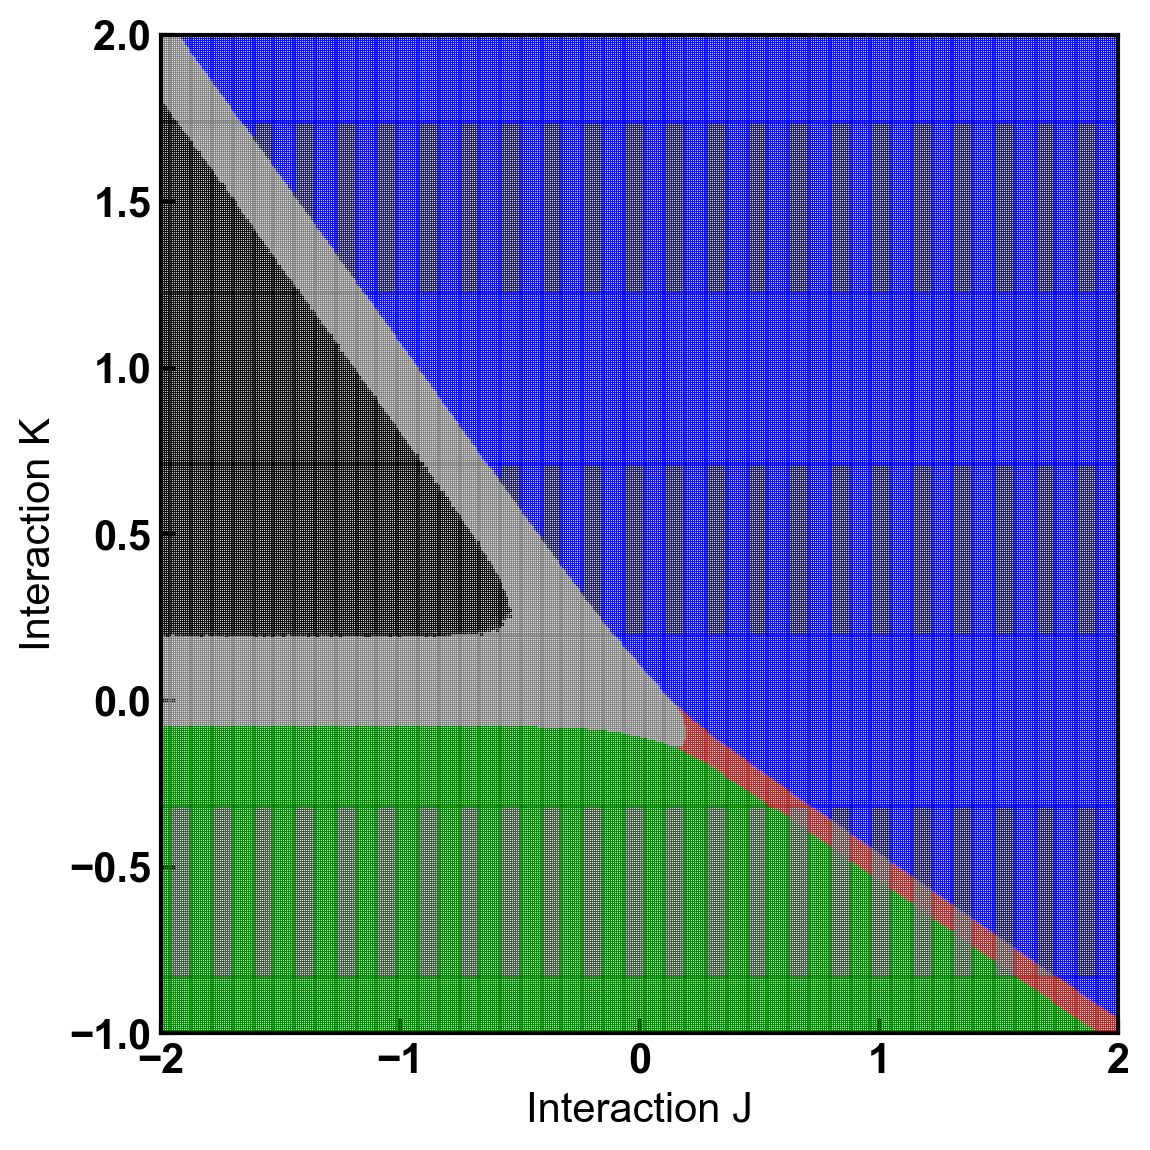

In [29]:
lw = 1.5
fs = 15
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), layout='tight')
fig.set_facecolor("white")
#plt.rc('lines', linewidth=lw)
#plt.rc('axes', linewidth=lw)

c = {"disorder":"grey",
     "orderA":"blue",
     "orderB":"green",
     "orderC":"brown",
     "other":"black"}

args = {'ms':.1, 'ls':"", 'marker':'s', 'alpha':1}
if disorder: ax.plot(np.array(disorder)[:,0], np.array(disorder)[:,1], mfc=c["disorder"], mec=c["disorder"], **args)
if orderA:   ax.plot(np.array(orderA)[:,0], np.array(orderA)[:,1], mfc=c["orderA"], mec=c["orderA"], **args)
if orderB:   ax.plot(np.array(orderB)[:,0], np.array(orderB)[:,1], mfc=c["orderB"], mec=c["orderB"], **args)
if orderC:   ax.plot(np.array(orderC)[:,0], np.array(orderC)[:,1], mfc=c["orderC"], mec=c["orderC"], **args)
if other:    ax.plot(np.array(other)[:,0], np.array(other)[:,1], mfc=c["other"], mec=c["other"], **args)

ax.axis([J_values[0], J_values[-1], K_values[0], K_values[-1]])
ax.tick_params(axis="both", direction="in", width=lw, length=5, labelsize=fs)
ax.set_xlabel("Interaction J", fontsize=fs)
ax.set_ylabel("Interaction K", fontsize=fs)
plt.show()